# PROJECT 2

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Creating the connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
# Checking the shape of the data
df.shape

(183978, 42)

In [4]:
# Checking for Null Values
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [5]:
# Dropping the Null Values
df.dropna(inplace=True)
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [6]:
# Analysing the columns
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [7]:
# Since the first four columns will not influence the overall rating, we remove them
# We also remove 'overall_rating' column sice that is our target
# Determining the features and the target
features = df.columns[5:]
target = ['overall_rating']

In [8]:
features.shape

(37,)

In [9]:
# Converting the data to contain categorical values using LabelEncoder
from sklearn import preprocessing
df= df.apply(preprocessing.LabelEncoder().fit_transform)

df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,9372,9802,175,33,29,1,4,14,48,...,53,45,64,68,67,5,10,9,7,7
1,1,9372,9802,161,33,29,1,4,14,48,...,53,45,64,68,67,5,10,9,7,7
2,2,9372,9802,151,28,24,1,4,14,48,...,53,45,64,65,67,5,10,9,7,7
3,3,9372,9802,124,27,23,1,4,14,47,...,52,44,61,62,64,4,9,8,6,6
4,4,9372,9802,0,27,23,1,4,14,47,...,52,44,61,62,64,4,9,8,6,6


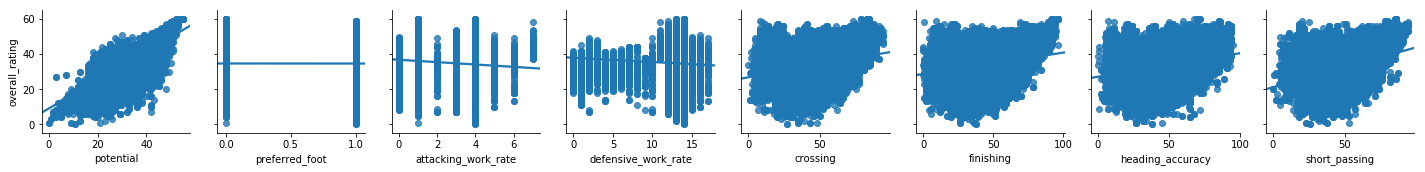

In [10]:
# Visualising the data to find out the relationship between various given parameters and the overall rating
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


sns.pairplot(df, x_vars = features[:8], y_vars= target, kind='reg')

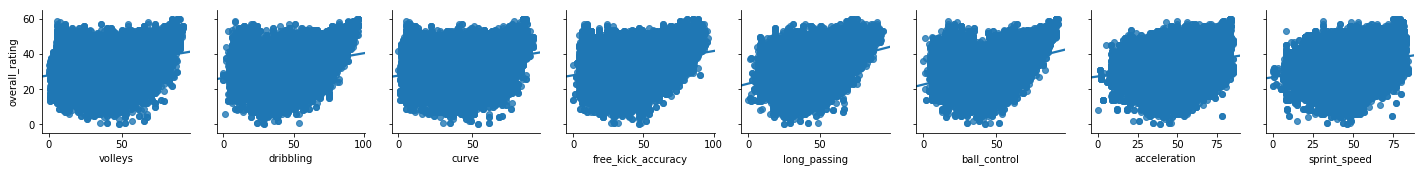

In [11]:
sns.pairplot(df, x_vars = features[8:16], y_vars= target, kind='reg')

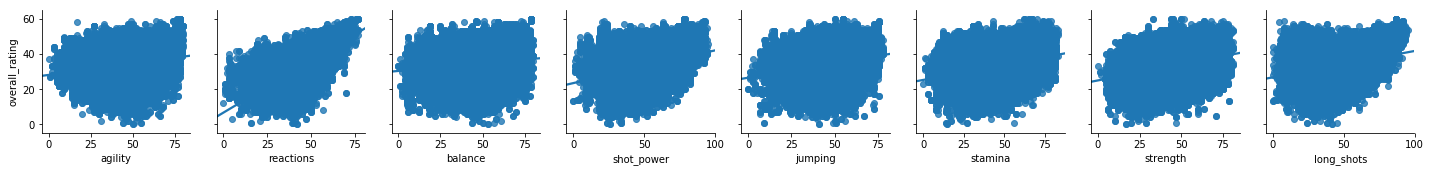

In [12]:
sns.pairplot(df, x_vars = features[16:24], y_vars= target, kind='reg')

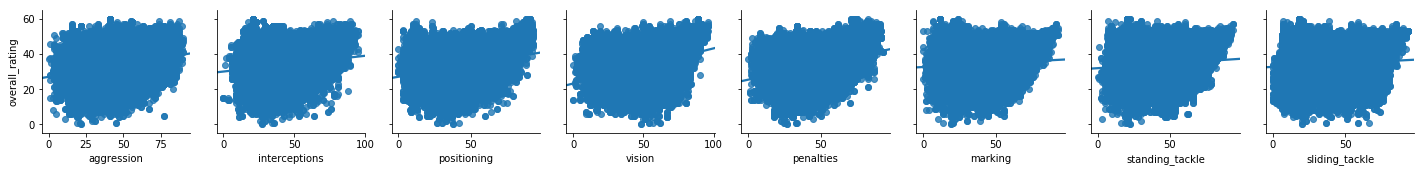

In [13]:
sns.pairplot(df, x_vars = features[24:32], y_vars= target, kind='reg')

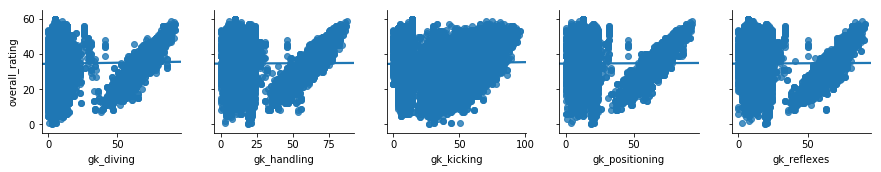

In [14]:
sns.pairplot(df, x_vars = features[32:], y_vars= target, kind='reg')

In [15]:
# Since most of the parameters exhibit a linear relationship with overall rating we can choose Linear Regression
# Defining X and y
X = df[features]
y = df[target]

In [16]:
import sklearn
# Splitting the dataset into test and train data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.33, random_state = 5)
# Both training dataset and the test dataset are in the proportion of 66.66% and 33.33%
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120837, 37)
(59517, 37)
(120837, 1)
(59517, 1)


In [17]:
from sklearn.linear_model import LinearRegression

# Training the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# printing intercept and coefficients
print("INTERCEPT : ",lm.intercept_)
print("\nCO-EFFICIENTS : \n","-"*80)

lst = list(zip(features.values,lm.coef_[0,:]))

for element in lst:
    print(element)

INTERCEPT :  [-13.95099353]

CO-EFFICIENTS : 
 --------------------------------------------------------------------------------
('potential', 0.3765027448181423)
('preferred_foot', -4.6258383688809196e-05)
('attacking_work_rate', -0.03902041413651539)
('defensive_work_rate', -0.056821872408990774)
('crossing', 0.022373917988570687)
('finishing', 0.010605598100513355)
('heading_accuracy', 0.07001598640302671)
('short_passing', 0.05024855850576223)
('volleys', 0.0043298137219015456)
('dribbling', -0.013485629987799194)
('curve', 0.010320995729563529)
('free_kick_accuracy', 0.013260349778036114)
('long_passing', 0.0067059531306759255)
('ball_control', 0.13515712161504942)
('acceleration', 0.005803879502330243)
('sprint_speed', 0.008545215222596006)
('agility', -0.008868032128250776)
('reactions', 0.21315488356431042)
('balance', 0.008036481458791109)
('shot_power', 0.016545774259639632)
('jumping', 0.01501148776670661)
('stamina', -0.005143147966185329)
('strength', 0.06089609240597389)
(

In [19]:
# Predicting the values using the model
y_pred = lm.predict(X_test)

Text(0.5,1,'Overall_Rating vs Predicted Overall_Rating: $Y_i$ vs $\\hat{Y}_i$')

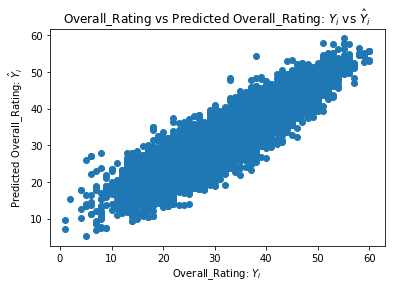

In [20]:
# Plotting a graph between the actual and the predicted values of Overall Rating
plt.scatter(y_test, y_pred)
plt.xlabel("Overall_Rating: $Y_i$")
plt.ylabel("Predicted Overall_Rating: $\hat{Y}_i$")
plt.title("Overall_Rating vs Predicted Overall_Rating: $Y_i$ vs $\hat{Y}_i$")


In [22]:
# Calculating the Ordinary Least Square
import statsmodels.formula.api as smf
f1 = 'overall_rating ~ potential+preferred_foot+attacking_work_rate+defensive_work_rate+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning+gk_reflexes'
lm = smf.ols(f1, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.593e+04
Date:                Fri, 28 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:40:44   Log-Likelihood:            -4.4131e+05
No. Observations:              180354   AIC:                         8.827e+05
Df Residuals:                  180316   BIC:                         8.831e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -13.9170      0.104   -133.496      0.000     -14.121     -13.713
potential               0.3784      0.001    258.222      0.000       0.376       0.381
preferred_foot          0.0144      0.016      0.902      0.367      -0.017       0.046
attacking_work_rate    -0.0380      0.005     -7.075      0.000      -0.048      -0.027
defensive_work_rate    -0.0628      0.005    -12.428      0.000      -0.073      -0.053
crossing                0.0225      0.001     26.486      0.000       0.021       0.024
finishing               0.0114      0.001     12.362      0.000       0.010       0.013
heading_accuracy        0.0693      0.001     84.544      0.000       0.068       0.071
short_passing           0.0497      0.001     35.853      0.000       0.047       0.052
volleys                 0.0040      0.001      4.884      0.000       0.002       0.006
dribbling              -0.0131      0.001    -11.232      0.000      -0.015      -0.011
curve                   0.0118      0.001     14.623      0.000       0.010       0.013
free_kick_accuracy      0.0127      0.001     17.706      0.000       0.011       0.014
long_passing            0.0078      0.001      8.222      0.000       0.006       0.010
ball_control            0.1346      0.002     84.528      0.000       0.132       0.138
acceleration            0.0063      0.001      4.518      0.000       0.004       0.009
sprint_speed            0.0085      0.001      6.498      0.000       0.006       0.011
agility                -0.0088      0.001     -8.598      0.000      -0.011      -0.007
reactions               0.2104      0.001    193.209      0.000       0.208       0.213
balance                 0.0081      0.001     10.282      0.000       0.007       0.010
shot_power              0.0168      0.001     19.026      0.000       0.015       0.019
jumping                 0.0157      0.001     21.504      0.000       0.014       0.017
stamina                -0.0061      0.001     -7.452      0.000      -0.008      -0.004
strength                0.0615      0.001     72.973      0.000       0.060       0.063
long_shots             -0.0137      0.001    -14.845      0.000      -0.015      -0.012
aggression              0.0196      0.001     28.503      0.000       0.018       0.021
interceptions           0.0125      0.001     16.898      0.000       0.011       0.014
positioning            -0.0110      0.001    -13.807      0.000      -0.013      -0.009
vision                 -0.0021      0.001     -2.360      0.018      -0.004      -0.000
penalties               0.0144      0.001     19.088      0.000       0.013       0.016
marking                 0.0324      0.001     28.757      0.000       0.030       0.035
standing_tackle         0.0034      0.001      2.593      0.010       0.001       0.006
sli

In [23]:
# Determining the confidence_intervals
lm.conf_int()

,0,1
Intercept,-14.121355,-13.712698
potential,0.375551,0.381296
preferred_foot,-0.016835,0.045540
attacking_work_rate,-0.048475,-0.027444
defensive_work_rate,-0.072751,-0.052930
crossing,0.020801,0.024125
finishing,0.009627,0.013256
heading_accuracy,0.067727,0.070942
short_passing,0.047019,0.052457
volleys,0.002421,0.005667


In [24]:
'''
OBSERVATION:

NULL HYPOTHESIS: There is no relationship between Overall Rating and the parameter concerned
ALTERNATIVE HYPOTHESIS: There is a relationship between Overall Rating and the parameter concerned 

We find that the parameters:
                1.preferred_foot,
                2.vision,
                3.standing_tackle     do not have significant p-values.

Thus the Null hypothesis is accepted for these parameters.

Thus we can conclude by saying that,
the Overall Rating is dependent on the following parameters:
      
      'attacking_work_rate',
       'defensive_work_rate', 
       'crossing',
       'finishing', 
       'heading_accuracy',
       'short_passing', 
       'volleys', 
       'dribbling',
       'curve', 
       'free_kick_accuracy',
       'long_passing',
       'ball_control',
       'acceleration',
       'sprint_speed',
       'agility',
       'reactions',
       'balance',
       'shot_power', 
       'jumping', 
       'stamina',
       'strength', 
       'long_shots',
       'aggression',
       'interceptions',
       'positioning',
       'penalties',
       'marking',
       'sliding_tackle',
       'gk_diving',
       'gk_handling',
       'gk_kicking',
       'gk_positioning',
       'gk_reflexes'


'''

"\nOBSERVATION:\n\nNULL HYPOTHESIS: There is no relationship between Overall Rating and the parameter concerned\nALTERNATIVE HYPOTHESIS: There is a relationship between Overall Rating and the parameter concerned \n\nWe find that the parameters:\n                1.preferred_foot,\n                2.vision,\n                3.standing_tackle     do not have significant p-values.\n\nThus the Null hypothesis is accepted for these parameters.\n\nThus we can conclude by saying that,\nthe Overall Rating is dependent on the following parameters:\n      \n      'attacking_work_rate',\n       'defensive_work_rate', \n       'crossing',\n       'finishing', \n       'heading_accuracy',\n       'short_passing', \n       'volleys', \n       'dribbling',\n       'curve', \n       'free_kick_accuracy',\n       'long_passing',\n       'ball_control',\n       'acceleration',\n       'sprint_speed',\n       'agility',\n       'reactions',\n       'balance',\n       'shot_power', \n       'jumping', \n  

In [25]:
# Calculating the Mean Square Error of the Model
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

7.770187747744008


In [26]:
# Calcuating the R-Squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 
# lm.rsquared

0.8424715309210027

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


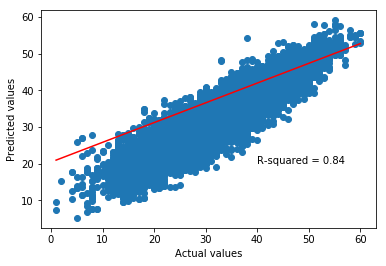

In [27]:
# Plotting the R-Square
import numpy as np
import matplotlib.pyplot as plt
r_squared = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
x1 = y_test.values[0,:]
y1 = y_pred[0,:]

# Line connecting all the unique values of y_test
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(x1,y1, 1))(np.unique(y_test)),color='red')


plt.text(40,20,'R-squared = %0.2f' % r_squared)
plt.show()

In [ ]:
'''
CONCLUSION: This model is a fairly good model since the R-Squared value of it is 0.84
'''